#### After testing GNILC - We explore the results generated by GNILC

In [1]:
import os
import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import healpy as hp

In [10]:
# load the fits files from output
file_path = '../GNILC/output/reconstructed_maps_rec_block_masked_lband.fits'

hdul = fits.open(file_path)
print(hdul.info())     
data = hdul[0].data
hdul.close()

Filename: ../GNILC/output/reconstructed_maps_rec_block_masked_lband.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (786432, 5)   float64   
None


In [11]:
# reconstructed map
rec_map = data

# the shape
print(f'The shape for the rec {data.shape}')

The shape for the rec (5, 786432)


In [16]:
# Load first ILC weights to see if they are zero
output = fits.getdata('../GNILC/output/ilc_weights_rec_block_masked_lband_0.fits')
print("ILC output min/max/mean:", np.min(output), np.max(output), np.mean(output))

ILC output min/max/mean: -2.4233903917906146 3.350324707761132 -1.666514284702852e-05


In [20]:
# Load first ILC weights to see if they are zero
output = fits.getdata('../GNILC/output/ilc_weights_rec_block_masked_lband_0.fits')
print("ILC output shape:", output.shape)

# Ensure output is a valid array for nside calculation
if output.ndim == 1:
    nside = hp.get_nside(output)
    print(f'The Nside of the reconstructed map {nside}')
elif output.ndim == 2:
    output = output[0, :]  # Select the first channel if it's 2D
    print("Using first channel of output for nside calculation.")
    nside = hp.get_nside(output)
    print(f'The Nside of the reconstructed map {nside}')
elif output.ndim == 3:
    output = output[:, 0, 0]  # Select the first channel and flatten it
    print("Using first channel of output for nside calculation.")
    nside = hp.get_nside(output)
    print(f'The Nside of the reconstructed map {nside}')
else:
    raise ValueError("Output is not a valid 1D, 2D, or 3D array.")

ILC output shape: (786432, 5, 5)
Using first channel of output for nside calculation.
The Nside of the reconstructed map 256


In [13]:
# info
nside = hp.get_nside(output)

print(f'The Nside of the reconstructed map {nside}')

TypeError: bad number of pixels

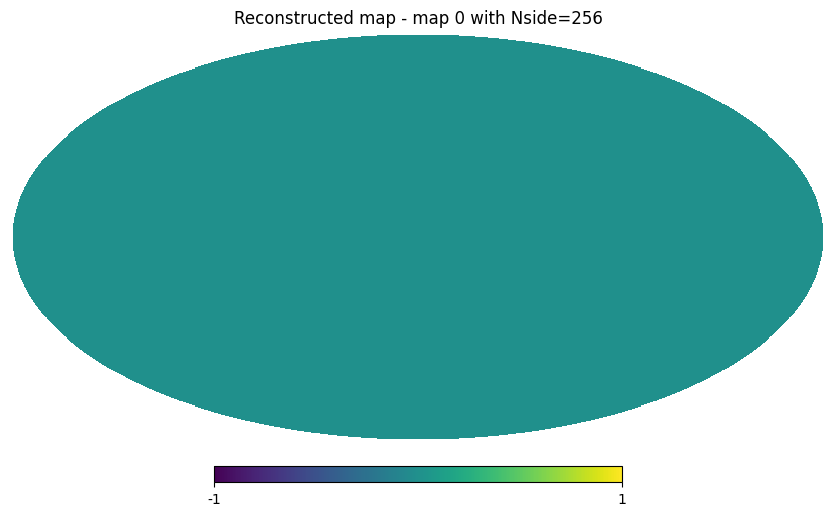

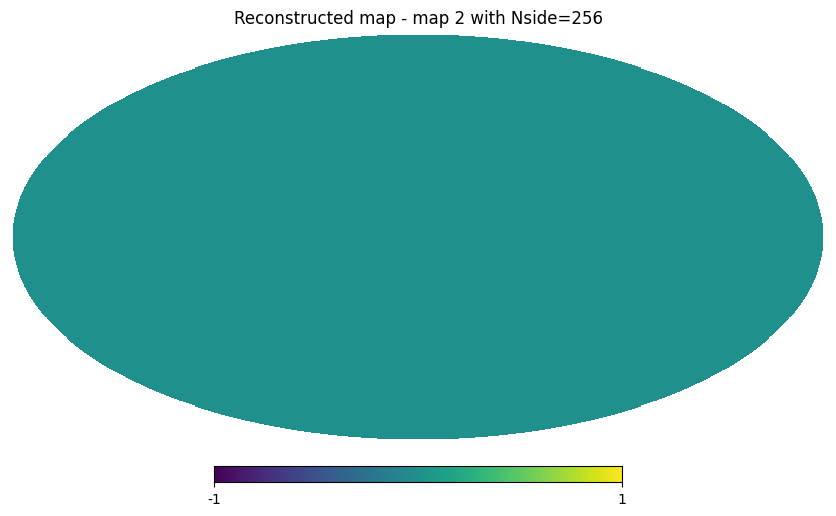

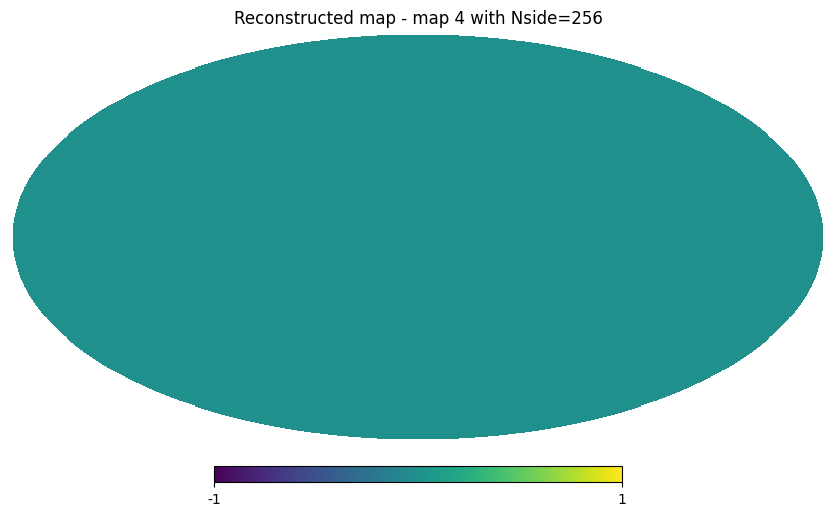

In [6]:
# view map
indices = [0, 2, 4]

for i in indices:
    hp.mollview(rec_map[i, :], title=f"Reconstructed map - map {i} with Nside={nside}")
    plt.show()

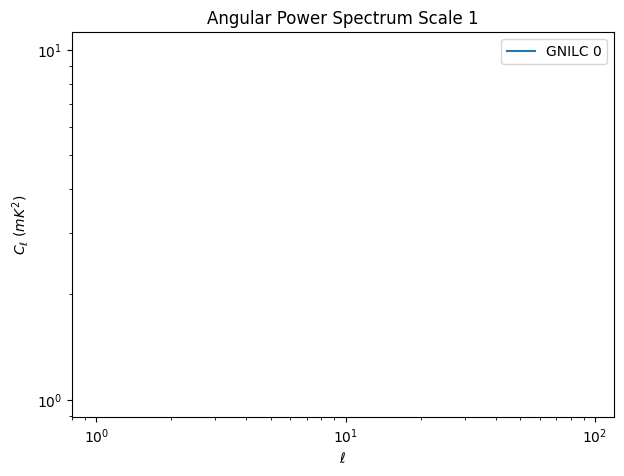

In [30]:
    # Compute Cl
cl_w0 = hp.anafast(w0_map)
cl_w1 = hp.anafast(w1_map)

# Multipole array
ell = np.arange(len(cl_w0))

# Plot
plt.figure(figsize=(7,5))
plt.loglog(ell, cl_w0, label=f'GNILC {0}')
#plt.loglog(ell, cl_w1, label=f'Prior {1}', linestyle='--')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$ $(mK^2)$')
plt.title(f'Angular Power Spectrum Scale {1}')
plt.legend()
plt.show()

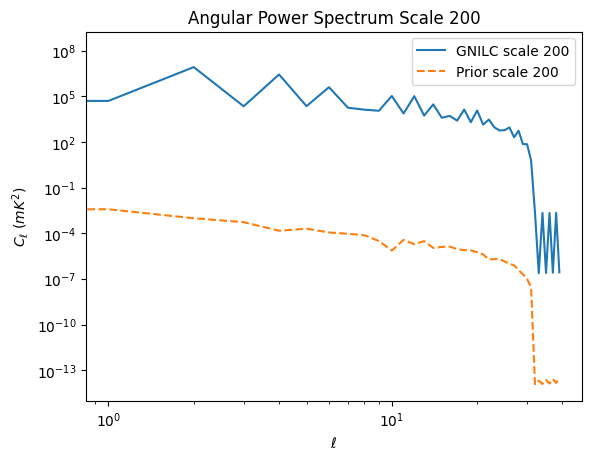

In [8]:
ell_max = 40 

# Truncate arrays
cl_w = cl_w[:ell_max]
cl_p = cl_p[:ell_max]
ell_trunc = np.arange(len(cl_w))

plt.loglog(ell_trunc, cl_w, label=f'GNILC scale {idx}')
plt.loglog(ell_trunc, cl_p, linestyle='--', label=f'Prior scale {idx}')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$ $(mK^2)$')
plt.title(f'Angular Power Spectrum Scale {idx}')
plt.legend()
plt.show()

In [9]:
# actual HI siganal
with fits.open('../21 cm/map_n-2_nc-252_ns-256_bw-mwa-32float_nreal-1.fits') as hdul:
    hdul.info()
    actual_map = hdul[0].data

Filename: ../21 cm/map_n-2_nc-252_ns-256_bw-mwa-32float_nreal-1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (786432, 252)   float32   


In [10]:
print(f'The actual HI have {actual_map.shape}')
print(f'Recovered have shape {w_data.shape}')

The actual HI have (252, 786432)
Recovered have shape (12288,)


In [11]:
# slice freq chn
actual_map = actual_map[0, :]
actual_mean = np.mean(actual_map, axis= 0)

In [12]:
print(f'Mean with shape {w_data.shape}')

Mean with shape (12288,)


In [13]:
'''ell_max = 30 

# Truncate arrays
cl_w = cl_w[:ell_max]
cl_p = cl_p[:ell_max]
cl_actual = hp.anafast(actual_mean)
cl_actual = cl_actual[:ell_max]
ell_trunc = np.arange(len(cl_w))

plt.loglog(ell_trunc, cl_w, label=f'GNILC scale {idx}')
#plt.loglog(ell_trunc, cl_p, linestyle='--', label=f'Prior scale {idx}')
plt.loglog(ell_trunc, cl_actual, label= f'The atual HI signal scale {idx}')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$ $(mK^2)$')
plt.title(f'Comparison of Angular Power Spectra {idx}')
plt.legend()
plt.show()'''

"ell_max = 30 \n\n# Truncate arrays\ncl_w = cl_w[:ell_max]\ncl_p = cl_p[:ell_max]\ncl_actual = hp.anafast(actual_mean)\ncl_actual = cl_actual[:ell_max]\nell_trunc = np.arange(len(cl_w))\n\nplt.loglog(ell_trunc, cl_w, label=f'GNILC scale {idx}')\n#plt.loglog(ell_trunc, cl_p, linestyle='--', label=f'Prior scale {idx}')\nplt.loglog(ell_trunc, cl_actual, label= f'The atual HI signal scale {idx}')\nplt.xlabel(r'$\\ell$')\nplt.ylabel(r'$C_\\ell$ $(mK^2)$')\nplt.title(f'Comparison of Angular Power Spectra {idx}')\nplt.legend()\nplt.show()"

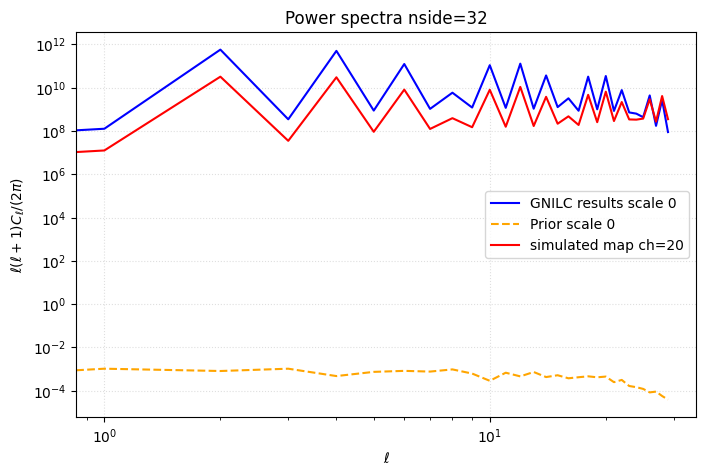

In [15]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.io import fits

#File paths
obs_file = '../data/map_LBand_in_mK.fits'   
wave_file = '../GNILC/output/wavelet_0.fits'
prior_file = '../GNILC/output/wavelet_target_0.fits'

# Load maps
obs_map = fits.getdata(obs_file)[20]            # channel 20
wave_map = fits.getdata(wave_file, ext=1)       # GNILC result
prior_map = fits.getdata(prior_file, ext=1)     # Prior

# Match resolution (downsample observed to wavelet nside)
nside = hp.npix2nside(len(wave_map))
obs_map = hp.ud_grade(obs_map, nside)

#Remove monopole (mean)
obs_map -= np.mean(obs_map)
wave_map -= np.mean(wave_map)
prior_map -= np.mean(prior_map)

# Compute spectra
lmax = 3*nside - 1
cl_obs = hp.anafast(obs_map, lmax=lmax)
cl_wave = hp.anafast(wave_map, lmax=lmax)
cl_prior = hp.anafast(prior_map, lmax=lmax)

ell = np.arange(len(cl_obs))
d_obs   = ell*(ell+1)*cl_obs/(2*np.pi)
d_wave  = ell*(ell+1)*cl_wave/(2*np.pi)
d_prior = ell*(ell+1)*cl_prior/(2*np.pi)

# Cut before noisy region
ell_cut = 30
ell = ell[:ell_cut]
d_obs, d_wave, d_prior = d_obs[:ell_cut], d_wave[:ell_cut], d_prior[:ell_cut]

# Plot
plt.figure(figsize=(8,5))
plt.loglog(ell, d_wave, label='GNILC results scale 0', color='blue')
plt.loglog(ell, d_prior, '--', label='Prior scale 0', color='orange')
plt.loglog(ell, d_obs, '-', label='simulated map ch=20', color='red')

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/(2\pi)$')
plt.title(f'Power spectra nside={nside}')
plt.legend()
plt.grid(True, ls=':', alpha=0.4)
plt.show()


In [ ]:
#compute per-scale diagnostics
import os, numpy as np
from astropy.io import fits
import healpy as hp
from scipy.stats import pearsonr

# Paths
base = os.path.expanduser('~/topol/Hons_Project/GNILC')
output_dir = os.path.join(base, 'output')

# Representative scales to evaluate
scales = [0, 50, 100, 150, 200]

def load_map(prefix, idx, hdu=1):
    fname = os.path.join(output_dir, f'{prefix}_{idx}.fits')
    return np.array(fits.getdata(fname, ext=hdu), dtype=np.float64)

rows = []
for idx in scales:
    try:
        g = load_map('wavelet', idx, hdu=1)       # GNILC map at this scale
        t = load_map('wavelet_target', idx, hdu=1) # target/prior (treated as truth)
    except FileNotFoundError as e:
        print("Missing file for scale", idx, e)
        continue

    # ensure same length
    assert g.size == t.size

    # residual
    r = g - t

    # metrics
    rmse = np.sqrt(np.mean(r**2))
    norm_rmse = rmse / (np.sqrt(np.mean(t**2)) + 1e-30)   # normalized by RMS(truth)
    bias = np.mean(r)
    rms_g = np.sqrt(np.mean(g**2))
    rms_t = np.sqrt(np.mean(t**2))
    rms_ratio = rms_g / (rms_t + 1e-30)
    # Pearson correlation (flatten)
    try:
        rpearson = pearsonr(g, t)[0]
    except Exception:
        rpearson = np.nan

    rows.append((idx, g.size, rmse, norm_rmse, bias, rpearson, rms_g, rms_t, rms_ratio))

# Print table
print(" scale | npix |   RMSE   | norm_RMSE |   bias   |  corr   |  RMS_g   |  RMS_truth  | RMS_g/RMS_t")
for row in rows:
    idx, npix, rmse, nrmse, bias, corr, rms_g, rms_t, rr = row
    print(f"{idx:5d} | {npix:5d} | {rmse:8.3e} | {nrmse:8.3e} | {bias:8.3e} | {corr:6.3f} | {rms_g:8.3e} | {rms_t:8.3e} | {rr:6.3f}")
